In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import re


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [9]:
import warnings
from termcolor import cprint
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")

In [10]:
train = pd.read_csv('../input/titanic/train.csv')
test  = pd.read_csv('../input/titanic/test.csv')

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
train.info()
cprint('-'*42,'red')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Null Values in Training Data :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Null Values in Test Data :
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


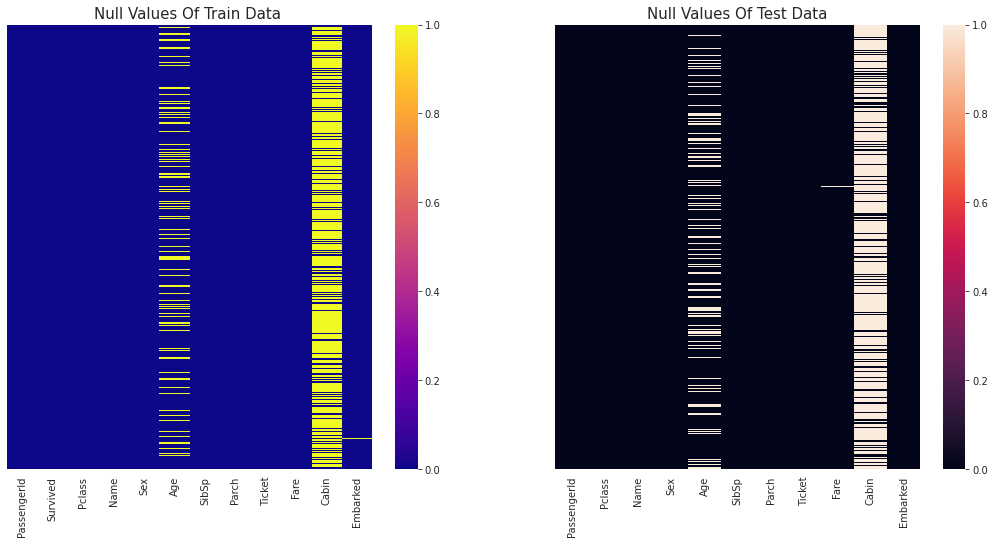

In [26]:
cprint('Null Values in Training Data :','green')
print(train.isnull().sum())
cprint('Null Values in Test Data :','green')
print(test.isnull().sum())

plt.figure(figsize=(18,18))


plt.subplot(221)
sns.heatmap(train.isnull(), yticklabels = False, cmap='plasma')
plt.title('Null Values Of Train Data ',size=15);
plt.subplot(222)
sns.heatmap(test.isnull(), yticklabels = False)
plt.title('Null Values Of Test Data',size=15);

Percent Of Survived :
      Sex  Survived
0  female  0.742038
1    male  0.188908
Count Of Male/Female :
Sex
female    314
male      577
dtype: int64


Text(0.5, 1.0, 'Number of passenger did/didnt Survived By Gender')

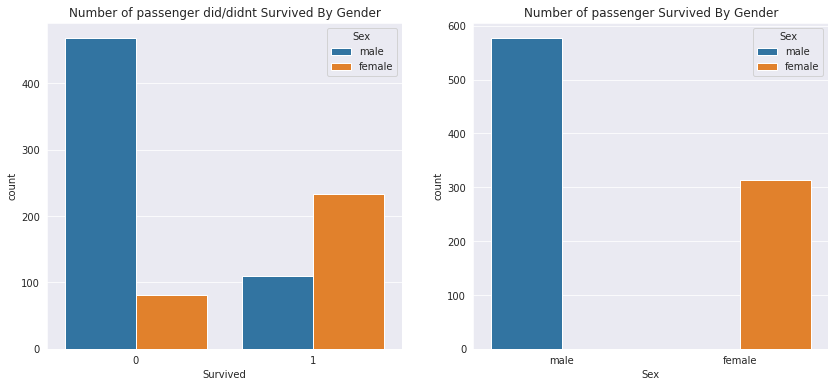

In [29]:
cprint('Percent Of Survived :','green')

print(train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

cprint('Count Of Male/Female :','green')

print(train.groupby('Sex').size())

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(14,6))


sns.countplot(x = 'Survived', hue='Sex', data=train, ax =  axis1)
axis2.set_title('Number of passenger Survived By Gender')

sns.countplot(x='Sex',data=train,hue='Sex', ax = axis2)
axis1.set_title('Number of passenger did/didnt Survived By Gender')

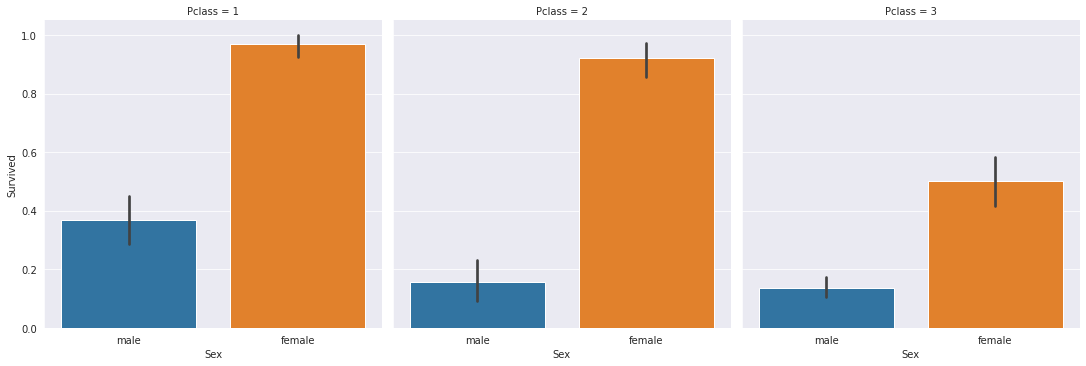

In [30]:
sns.catplot(x = 'Sex', y = 'Survived', data = train, kind = 'bar', col = 'Pclass')

Percent Of Survived :
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
Cout Of Each Embarked  :
Embarked
C    168
Q     77
S    644
dtype: int64


Text(0.5, 1.0, 'Number of passenger Survived in each Pclass')

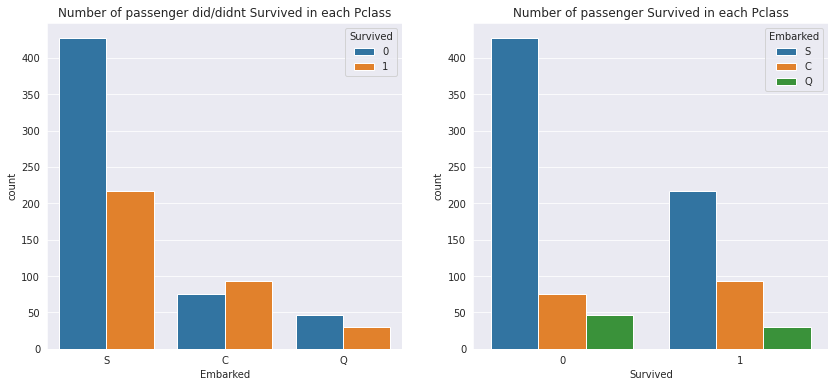

In [31]:
cprint('Percent Of Survived :','green')

# Showing  Percentage of survivors of Each Embarked
print(train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False))

cprint('Cout Of Each Embarked  :','green')

# Showing  Count  of Pepole  of Each Embarked
print(train.groupby('Embarked').size())

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(14,6))

# Showing  count of survived of Each Embarked
sns.countplot('Embarked', hue = 'Survived', data = train,ax=axis1)
axis1.set_title('Number of passenger did/didnt Survived in each Pclass')
sns.countplot(x='Survived',data=train,hue='Embarked', ax = axis2)
axis2.set_title('Number of passenger Survived in each Pclass')

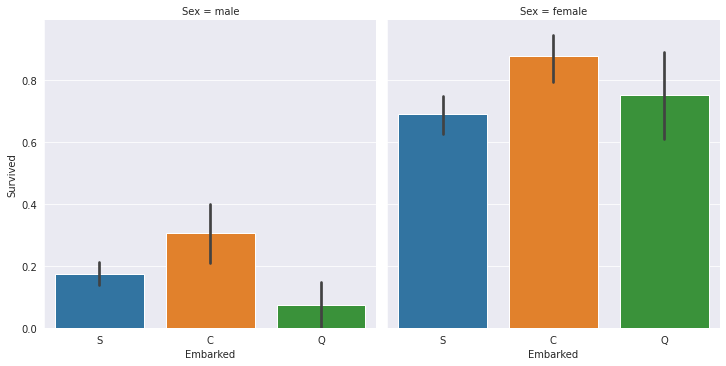

In [32]:
sns.catplot(x = 'Embarked', y = 'Survived', kind = 'bar', data = train, col = 'Sex')

Text(0.5, 1.0, 'Age Distribution of passengers')

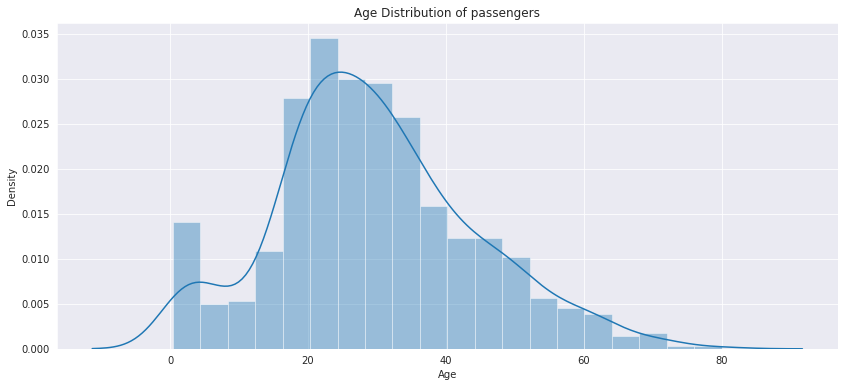

In [33]:
plt.figure(figsize = (14, 6))
# showing distribute of age column with .distplot() of seaborn
sns.distplot(train['Age'])
plt.title('Age Distribution of passengers',)

Text(0.5, 1.0, 'Mean Value of Age of each gender')

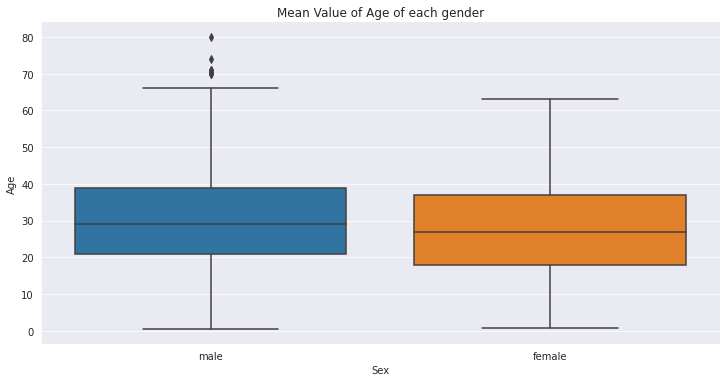

In [34]:
# showing mean age of Male/Female using boxplot
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train, height = 5, aspect = 2)
plt.title('Mean Value of Age of each gender',)

Text(0.5, 0.98, 'Mean Value of Age of each male/femlae in  Pclasses')

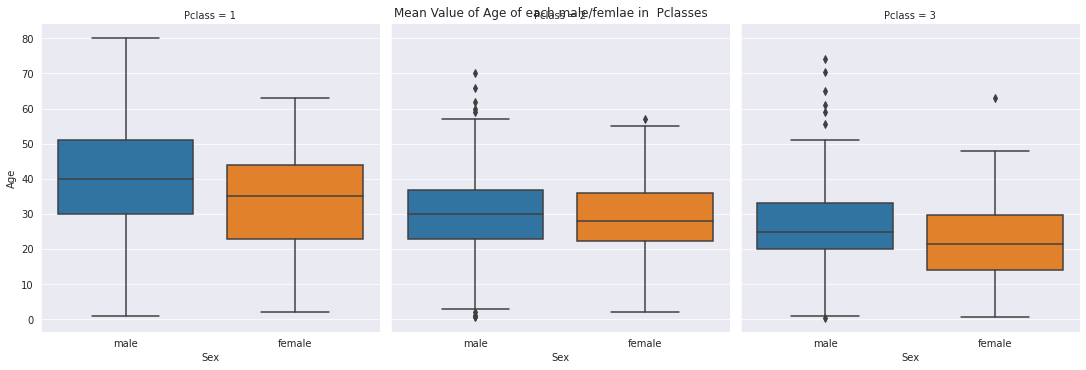

In [35]:
# showing mean age of each geneder of each Ticket class (Pclass) using boxplot
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train, col = 'Pclass')
#plt.title('Mean Value of Age of each male/femlae in  Pclasses')
plt.suptitle('Mean Value of Age of each male/femlae in  Pclasses')


Text(0.5, 0.98, 'Mean Value of Age of each male/femlae in  Pclasses')

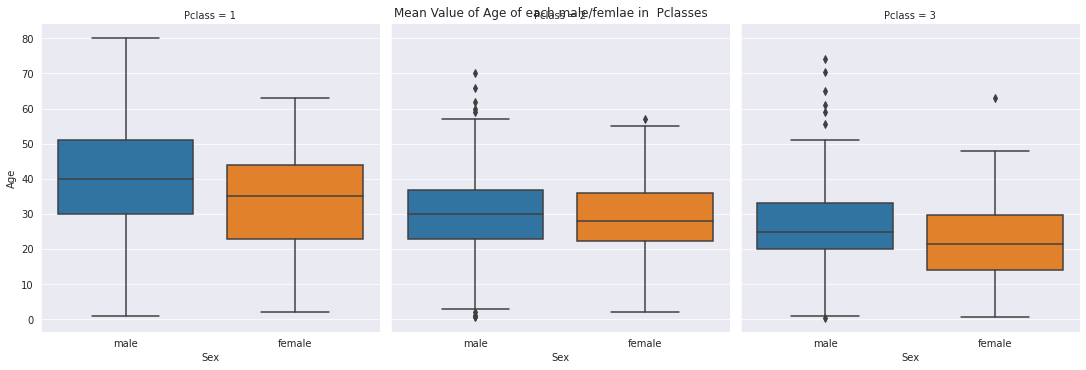

In [36]:
# showing mean age of each geneder of each Ticket class (Pclass) using boxplot
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train, col = 'Pclass')
#plt.title('Mean Value of Age of each male/femlae in  Pclasses')
plt.suptitle('Mean Value of Age of each male/femlae in  Pclasses')

Text(0.5, 1.0, 'Mean Value of Age of each  Pclass Passengers (Test Data)')

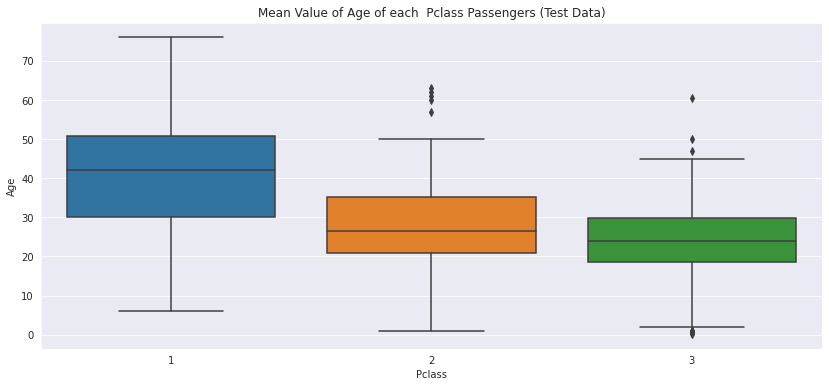

In [37]:
plt.figure(figsize = (14, 6))
# showing mean age of each Ticket class (Pclass) using boxplot for test data
sns.boxplot(x='Pclass',y='Age',data=test)
plt.title('Mean Value of Age of each  Pclass Passengers (Test Data)',)

Text(0.5, 1.0, 'Difference in the amount of  Fare paid')

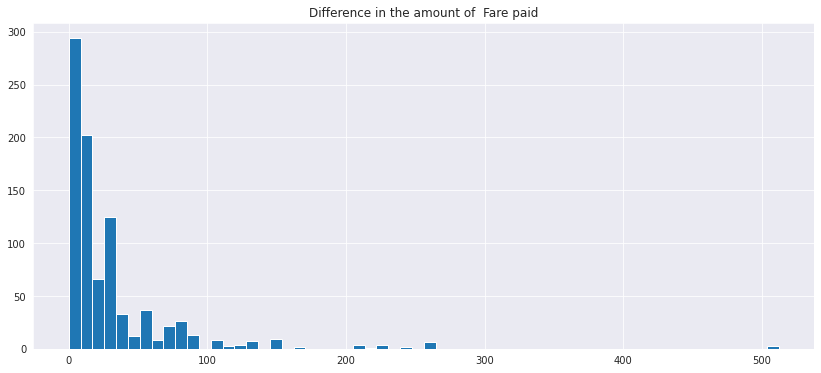

In [38]:
plt.figure(figsize = (14, 6))
# showing histogram of Paid Fare using .hist() of matplotlib 
plt.hist('Fare',data=train, bins = 60)
plt.title('Difference in the amount of  Fare paid')


Percent Of Survived :
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
Cout Of Each Embarked  :
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64


Text(0.5, 1.0, 'Number of Siblings or  couples  Survived by gender')

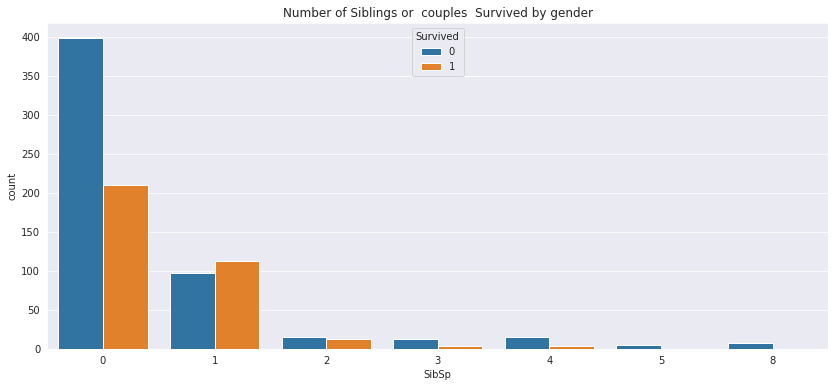

In [39]:
cprint('Percent Of Survived :','green')
# Showing  Percentage of survivors of Siblings or  couples 
print(train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cprint('Cout Of Each Embarked  :','green')
# Showing  count of   Siblings or  couples 
print(train.groupby('SibSp').size())
plt.figure(figsize = (14, 6))
# using .countplot() of seaborn to  visualize  Count survived Siblings or  couples 
sns.countplot(x = 'SibSp', data = train, hue = 'Survived')
plt.title('Number of Siblings or  couples  Survived by gender')

Percent Of Survived :
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
Cout Of Each Embarked  :
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64


Text(0.5, 1.0, 'Number of Siblings or  couples  Survived')

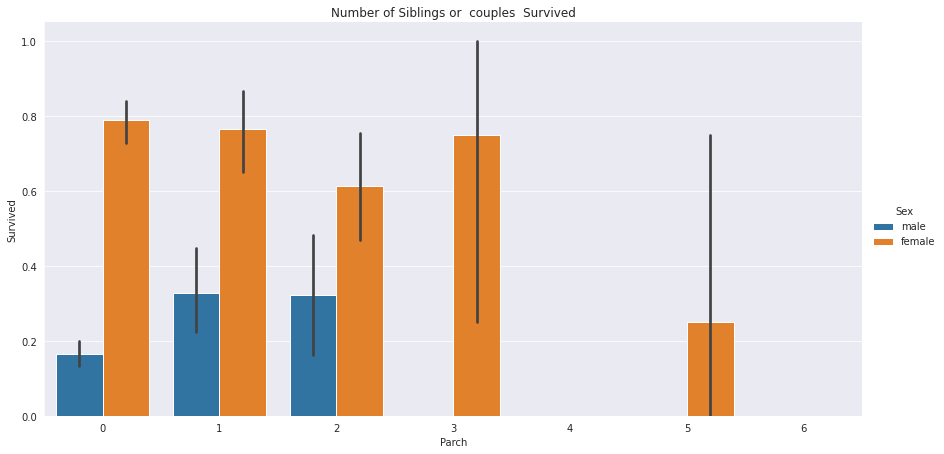

In [40]:
cprint('Percent Of Survived :','green')
# Showing  Percentage of survivors of Parents /children   
print(train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))
cprint('Cout Of Each Embarked  :','green')
# Showing  count of   Parents /children   
print(train.groupby('Parch').size())
# using .countplot() of seaborn to  visualize  Count survived Siblings or  couples 
sns.catplot(x = 'Parch', y = 'Survived', data = train, hue = 'Sex', kind = 'bar', height = 6, aspect = 2)
plt.title('Number of Siblings or  couples  Survived')

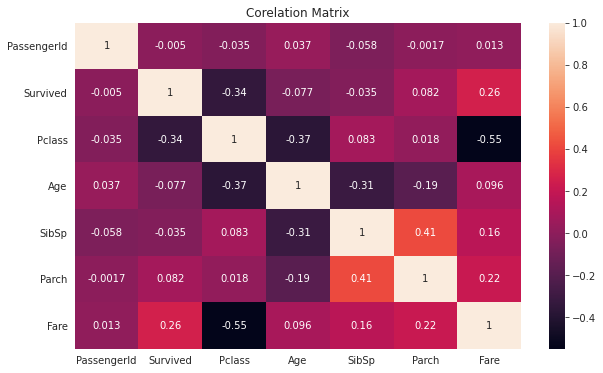

In [41]:
plt.figure(figsize = (10, 6))
# using .heatmap() of seaborn to understand better relationship of variables 
sns.heatmap(train.corr(), annot=True)
plt.title('Corelation Matrix');

In [42]:
# replace Gender with 0 and 1  in test & train data

train.Sex[train.Sex == 'male'] = 0 # repalce male with 0
train.Sex[train.Sex == 'female'] = 1 # repalce female with 1

test.Sex[test.Sex == 'male'] = 0 # repalce male with 0
test.Sex[test.Sex == 'female'] = 1 # repalce male with 1


In [43]:
# replace Missing values of age row with mean age of each Ticket class (Pclass) of train data
def clean_training_age(columns) :
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass ==1 :
            return 37
        elif  Pclass == 2 :
            return 29
        else : 
            return 24
    else : 
        return Age

In [44]:
def clean_test_age(columns) :
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass ==1 :
            return 44
        elif  Pclass == 2 :
            return 27
        else : 
            return 23
    else : 
        return Age

In [45]:
train.Age = train[['Age','Pclass']].apply(clean_training_age,axis=1) 
test.Age = test[['Age','Pclass']].apply(clean_test_age,axis=1)
# replace Nan values of Cabin with U (Unknown)
train.Cabin = train.Cabin.fillna('U')
test.Cabin = test.Cabin.fillna('U')

In [46]:
train = train.dropna()
# Convert Embarked into dummies using pd.get_dummies()
dummies  = pd.get_dummies(train.Embarked)
train = pd.concat([train,dummies],axis='columns')
train.drop(['Embarked'],axis='columns',inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,0,0,1


In [47]:
dummies  = pd.get_dummies(test.Embarked)
test = pd.concat([test,dummies],axis='columns')
test.drop(['Embarked'],axis='columns',inplace=True)
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
C              0
Q              0
S              0
dtype: int64

In [48]:
# Drop missing values of train data 
train = train.dropna()
# Using Regex to find letters and categories better cabin 
train.Cabin = train.Cabin.map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test.Cabin = test.Cabin.map(lambda x:re.compile("([a-zA-Z])").search(x).group())
train.groupby('Cabin').size()

Cabin
A     15
B     45
C     59
D     33
E     32
F     13
G      4
T      1
U    687
dtype: int64

In [49]:
# replace Cabins with numbers 
cabin_dictionary = {'A':1 , 'B':2, 'C':3 , 'D':4 , 'E':5 , 'F':6 , 'G':7 , 'T':8 , 'U':9}

train = train.replace({'Cabin':cabin_dictionary})
test = test.replace({'Cabin':cabin_dictionary})
# combaine number of siblings and  spouses  to get  FamilySize train data
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
# combaine number of siblings and  spouses  to get  FamilySize test data
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
cprint('Percent Of Survived :','green')
# Showing  Percentage of survivors of Both gender Male/Female
print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False))

cprint('Count Of FamilySizes aboard titanic :','green')
# Showing  Count of Both gender Male/Female
print(train.groupby('FamilySize').size())

Percent Of Survived :
   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.300935
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000
Count Of FamilySizes aboard titanic :
FamilySize
1     535
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
dtype: int64


Null Values in Training Data :
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
C              0
Q              0
S              0
FamilySize     0
dtype: int64
Null Values in Test Data :
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
C              0
Q              0
S              0
FamilySize     0
dtype: int64


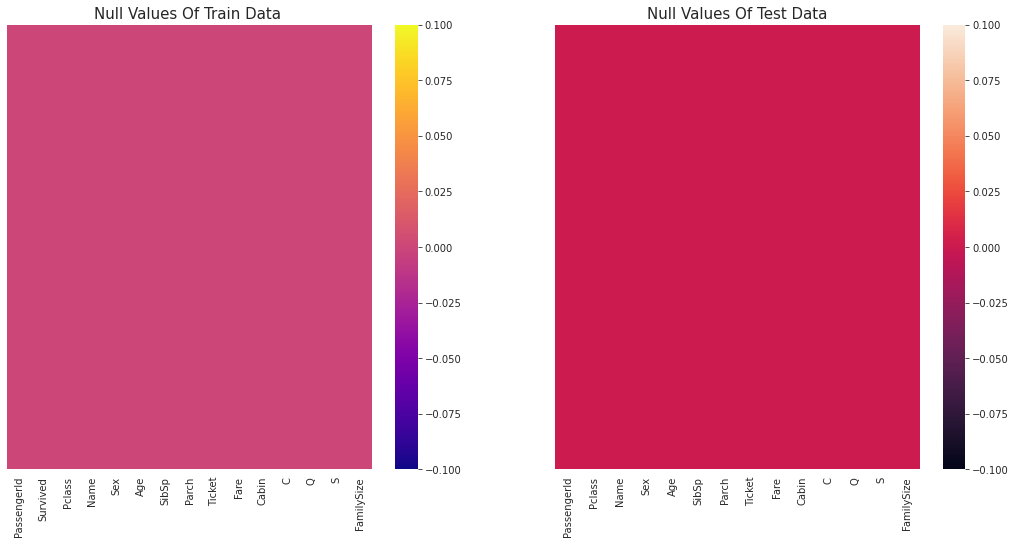

In [50]:
# replace missing Fare value of test data with median of Fares 
test.Fare = test.Fare.fillna(test.Fare.median())
cprint('Null Values in Training Data :','green')
print(train.isnull().sum()) # showing null values of each row of train data
cprint('Null Values in Test Data :','green')
print(test.isnull().sum()) # showing null values of each row of test data

plt.figure(figsize=(18,18))

# using heatmap of seaborn to visualize null values
plt.subplot(221)
sns.heatmap(train.isnull(), yticklabels = False, cmap='plasma')
plt.title('Null Values Of Train Data ',size=15);
plt.subplot(222)
sns.heatmap(test.isnull(), yticklabels = False)
plt.title('Null Values Of Test Data',size=15);


In [51]:
# drop unused columns of test and train data 
train_main = train.drop(['Name','SibSp', 'Parch', 'Ticket','Fare'], axis = 1)
test_main = test.drop(['Name','SibSp', 'Parch', 'Ticket','Fare'], axis = 1)

In [52]:
# split dependent  and independent  variables
X_train = train_main.drop('Survived',axis=1) # independent
y_train = train_main.Survived # dependent

X_test = test_main # independent
y_test = pd.read_csv('../input/titanic/gender_submission.csv') # dependent
y_test = y_test.drop(['PassengerId'],axis=1) # drop useless columns
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred = RFC.predict(X_test)
RFC.score(X_train,y_train)

1.0

In [54]:
LGC = LogisticRegression(solver='lbfgs',fit_intercept=False,warm_start=True)
LGC.fit(X_train,y_train)

LogisticRegression(fit_intercept=False, warm_start=True)

In [55]:
y_pred =LGC.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9760765550239234
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       266
           1       0.95      0.99      0.97       152

    accuracy                           0.98       418
   macro avg       0.97      0.98      0.97       418
weighted avg       0.98      0.98      0.98       418

[[258   8]
 [  2 150]]


In [56]:
final_data_1 = {'PassengerId': X_test.PassengerId, 'Survived': y_pred}
submission_1 = pd.DataFrame(data=final_data_1)
submission_1.to_csv('submission_lrc.csv',index =False)